In [ ]:
예측하려는 레이블이 수치형일 때 사용하는 것: 선형회귀

In [1]:
from IPython.display import display, Image

In [2]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.20.1
3.3.4


In [4]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print( sklearn.__version__)
print( mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

0.24.1
0.1.9


w[0]: 0.393906  b: -0.031804


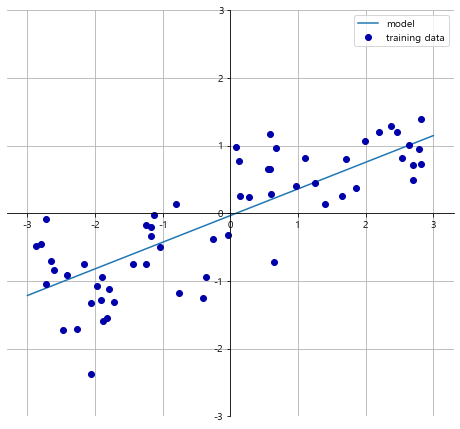

In [5]:
mglearn.plots.plot_linear_regression_wave()

In [6]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [7]:
boston = load_boston()
X = boston.data
y = boston.target

In [8]:
#예측하려는 레이블
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

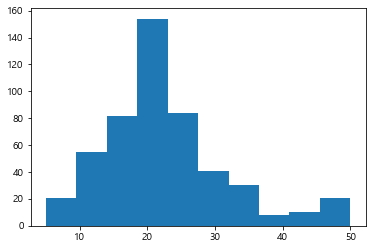

In [9]:
plt.hist(y)

종 모양 = 정규 분포를 갖는다

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
## model = 모델명()
## model.fit(입력, 답)    #답 = 레이블     ## 가중치, bias 정해짐
## pred = model.predict(새로운 데이터 입력)

주택 평균 가격 예측

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[0:10]

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346])

MSE 구하기

In [14]:
import pandas as pd

In [18]:
dict_dat = {"실제값": y_test, "예측값":pred, "오차":y_test-pred}
dat = pd.DataFrame(dict_dat)
dat.head

<bound method NDFrame.head of       실제값        예측값        오차
0    23.6  28.838854 -5.238854
1    32.4  36.007833 -3.607833
2    13.6  15.083248 -1.483248
3    22.8  25.230909 -2.430909
4    16.1  18.878641 -2.778641
..    ...        ...       ...
122   8.8   3.284209  5.515791
123  19.2  23.798796 -4.598796
124  25.3  25.733299 -0.433299
125  20.4  23.048156 -2.648156
126  23.1  24.730468 -1.630468

[127 rows x 3 columns]>

In [19]:
dat.shape[0]

127

In [20]:
dat['오차제곱'] = dat['오차']*dat['오차']
mse_val = dat['오차제곱'].sum() / dat.shape[0]
mse_val

22.098694827098036

MAE 구하기

In [21]:
#np.abs = 절댓값
mae_val = np.abs(dat['오차']).sum()/dat.shape[0]
mae_val

3.060939595437034

RMSE 구하기

In [22]:
rmse_val = mse_val ** 0.5
rmse_val

4.700924890603766

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

22.098694827098036

In [27]:
## MSE ((실제값-예측값)^2)-전체합 / 데이터개수
## RMSE : MSE에 루트 씌운 것
## MAE : 절대값(실제값 -예측값) 전체 합 / 데이터 개수
## RMLSE : RMSE에 실제값과 예측값 로그 처리 
## => (LOG(실제값+1)-LOG(예측값+1) 처리해준 것

In [28]:
print("학습용 데이터 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터 결정 계수 : 0.75
테스트 데이터 결정 계수 : 0.68


In [29]:
## 75% - 25%
## 70% - 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3,
                                                   random_state = 42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

tr_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("학습용: {}, 테스트용: {}".format(tr_score, test_score))

학습용: 0.7434997532004697, 테스트용: 0.711226005748496


75% 25% 모델보다 7:3모델이, 7:3 모델보다 9:1 모델이 더 근접하다고 판단

In [36]:
#90% - 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.1,
                                                   random_state = 42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

tr_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("학습용: {}, 테스트용: {}".format(tr_score, test_score))

학습용: 0.7375152736886281, 테스트용: 0.7598135533532498


best : 학습용 결정계수 값 > 테스트용 결정계수 값

In [42]:
## 9-1, 8-2, 7-3, 6-4, 5-5
for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size=(i/10),
                                                       random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    tr_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"학습용: {10-i}, 테스트용: {i}")
    print("학습용:{}, 테스트용:{}".format(tr_score, test_score))
    
    pred = model.predict(X_test)
    mse_val = np.sum ((y_test - pred) **2) / len(pred)
    print("mse value : {}".format(mse_val))
    rmse_val = mse_val ** 0.5
    print("rmse value : {}".format(rmse_val))   

학습용: 9, 테스트용: 1
학습용:0.7375152736886281, 테스트용:0.7598135533532498
mse value : 14.995852876582495
rmse value : 3.872447917865713
학습용: 8, 테스트용: 2
학습용:0.7508856358979673, 테스트용:0.6687594935356329
mse value : 24.291119474973456
rmse value : 4.928602182665331
학습용: 7, 테스트용: 3
학습용:0.7434997532004697, 테스트용:0.711226005748496
mse value : 21.517444231176995
rmse value : 4.638689926172797
학습용: 6, 테스트용: 4
학습용:0.747199884740759, 테스트용:0.7125140936111221
mse value : 21.832709989577456
rmse value : 4.6725485540096265
학습용: 5, 테스트용: 5
학습용:0.7719887864238002, 테스트용:0.6896917482875753
mse value : 25.175390536116975
rmse value : 5.017508399207417


# class02

In [43]:
import mglearn

In [45]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
import pandas as pd

In [46]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [48]:
boston = load_boston()
print(type(boston.data), type(boston.target))

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['price'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [50]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [53]:
# 입력과 출력 - X, y
X = df_boston.loc[ : , 'CRIM' : 'LSTAT']
y = df_boston['price']

print(X.shape, y.shape)
print(df_boston['CRIM'].min(), df_boston['CRIM'].max())
print(df_boston['NOX'].min(), df_boston['NOX'].max())
print(df_boston['INDUS'].min(), df_boston['INDUS'].max())

(506, 13) (506,)
0.00632 88.9762
0.385 0.871
0.46 27.74


In [61]:
## 데이터 정규화. 데이터의 값의 범위 0~.. -> 0-1
nor_X = MinMaxScaler().fit_transform(X)

print(type(nor_X))
print(np.min(nor_X[0]), np.max(nor_X[0]))
print(np.min(nor_X[1]), np.max(nor_X[1]))

<class 'numpy.ndarray'>
0.0 0.9999999999999999
0.0 0.9999999999999999


In [62]:
print(X.shape, y.shape)

ex_X = PolynomialFeatures(degree=2, include_bias=False). fit_transform(nor_X)
                          
print(ex_X.shape, y.shape)

(506, 13) (506,)
(506, 104) (506,)


In [63]:
# a b c => a b c a**2 b**2 c**2 a*b a*c c*a ...

In [64]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)

ex_model = LinearRegression().fit(X_train, y_train)

print(ex_model.score(X_train, y_train), ex_model.score(X_test, y_test))

0.9448313975211593 0.7758378393351696


In [65]:
## feature를 많이 만든 후 계산

In [66]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)

ex_model = LinearRegression().fit(X_train, y_train)

print(ex_model.score(X_train, y_train), ex_model.score(X_test, y_test))

0.9448313975211593 0.7758378393351696


=> 과대적합 (train 결과 > test 결과) (모의고사 잘 봄, but 실전에서 못 봄)

In [67]:
#모델을 Lasso 회귀로 불러오기

In [68]:
from sklearn.linear_model import Lasso

In [69]:
lasso_m = Lasso(alpha=0.01).fit(X_train, y_train)
print(lasso_m.score(X_train, y_train), lasso_m.score(X_test, y_test))

0.8865033777946089 0.80359225764207


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


=> test 데이터 값 향상됨

In [70]:
#Ridge 회귀로 불러오기

In [72]:
from sklearn.linear_model import Ridge

In [78]:
ridge_m = Ridge(alpha=0.01). fit(X_train, y_train)
print(ridge_m.score(X_train, y_train), ridge_m.score(X_test, y_test))

0.9357645261988864 0.8144760713008222


## 라소회귀(L1) - w값을 0으로 만드는 것이 생김

In [79]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

학습용 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26


In [80]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.78
사용한 특성의 수 :  102


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471444, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [82]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

학습용 데이터 세트 점수 :  0.8864717420585476
테스트 데이터 세트 점수 :  0.8036004116583615
사용한 특성의 수 :  34


In [86]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

학습용 데이터 세트 점수 :  0.7471467575228325
테스트 데이터 세트 점수 :  0.6986891802234085
사용한 특성의 수 :  12


In [85]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso10.coef_ != 0))

학습용 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301
사용한 특성의 수 :  0


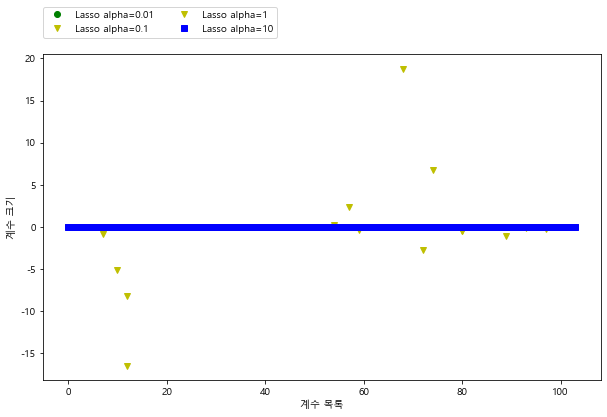

In [89]:
lasso = Lasso(alpha=1).fit(X_train, y_train)

plt.figure(figsize=(10,6))
# plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso.coef_, 'yv', label="Lasso alpha=1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
# plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

# 릿지회귀(L2) - w값을 0으로 만드는 것 x

In [97]:
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge00001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.79
사용한 특성의 수 :  104


In [94]:
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge0001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge0001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge0001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [92]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [93]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge01.coef_ != 0))

학습용 데이터 점수 : 0.92
테스트 데이터 점수 : 0.82
사용한 특성의 수 :  104


In [95]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge1.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge1.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge1.coef_ != 0))

학습용 데이터 점수 : 0.87
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [96]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge10.coef_ != 0))

학습용 데이터 점수 : 0.77
테스트 데이터 점수 : 0.73
사용한 특성의 수 :  104


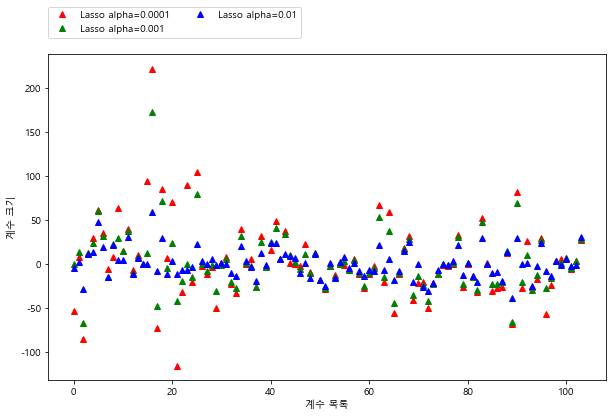

In [100]:
plt.figure(figsize=(10,6))
plt.plot(ridge00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(ridge0001.coef_, "g^", label="Lasso alpha=0.001")
plt.plot(ridge001.coef_, "b^", label="Lasso alpha=0.01")
#plt.plot(ridge01.coef_, 'go', label="Lasso alpha=0.1")
#plt.plot(ridge1.coef_, 'yv', label="Lasso alpha=1")
#plt.plot(ridge10.coef_, "rs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
# plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

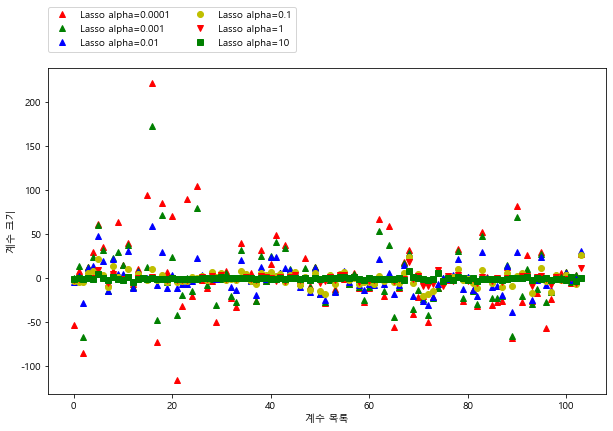

In [99]:
plt.figure(figsize=(10,6))
plt.plot(ridge00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(ridge0001.coef_, "g^", label="Lasso alpha=0.001")
plt.plot(ridge001.coef_, "b^", label="Lasso alpha=0.01")
plt.plot(ridge01.coef_, 'yo', label="Lasso alpha=0.1")
plt.plot(ridge1.coef_, 'rv', label="Lasso alpha=1")
plt.plot(ridge10.coef_, "gs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
# plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()